# Import

In [1]:
!pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier

from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")


import chart_studio.plotly as py
import cufflinks as cf

import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline();

import plotly.graph_objs as go

# Data Preprocessing

In [5]:
# Đọc file dữ liệu
df = pd.read_csv('mobile_data.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,NaN,2.2,0.0,1,0.0,7,0.6,188,2,...,20,756,2549,9.0,7,19,0.0,No,Yes,1
1,1021,1.0,0.5,1.0,0,1.0,53,0.7,136,3,...,905,1988,2631,17.0,3,7,1.0,Yes,No,2
2,563,1.0,0.5,1.0,2,1.0,41,0.9,145,5,...,1263,1716,2603,11.0,2,9,1.0,Yes,No,2
3,615,1.0,2.5,0.0,0,0.0,10,0.8,131,6,...,1216,1786,2769,16.0,8,11,1.0,No,No,2
4,1821,1.0,1.2,0.0,13,1.0,44,0.6,141,2,...,1208,1212,1411,8.0,2,15,1.0,Yes,No,1


In [6]:
# Cấu trúc dataframe
print('Các CỘT : ', df.columns.tolist())
print("Số dòng m = ", df.shape[0])
print("Số cột n = ", df.shape[1])

Các CỘT :  ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
Số dòng m =  2099
Số cột n =  21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2099 non-null   int64  
 1   blue           2083 non-null   float64
 2   clock_speed    2099 non-null   float64
 3   dual_sim       2062 non-null   float64
 4   fc             2099 non-null   int64  
 5   four_g         2049 non-null   float64
 6   int_memory     2099 non-null   int64  
 7   m_dep          2099 non-null   float64
 8   mobile_wt      2099 non-null   int64  
 9   n_cores        2099 non-null   int64  
 10  pc             2046 non-null   float64
 11  px_height      2099 non-null   int64  
 12  px_width       2099 non-null   int64  
 13  ram            2099 non-null   int64  
 14  sc_h           2033 non-null   float64
 15  sc_w           2099 non-null   int64  
 16  talk_time      2099 non-null   int64  
 17  three_g        1992 non-null   float64
 18  touch_sc

# Xử lý dữ liệu Duplicates

In [8]:
duplicateRows = df[df.duplicated()]
print('Số dòng dữ liệu duplicates: ', len(duplicateRows))

Số dòng dữ liệu duplicates:  99


In [9]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           1984 non-null   float64
 2   clock_speed    2000 non-null   float64
 3   dual_sim       1963 non-null   float64
 4   fc             2000 non-null   int64  
 5   four_g         1950 non-null   float64
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             1947 non-null   float64
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           1934 non-null   float64
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        1893 non-null   float64
 18  touch_sc

# Xử lý dữ liệu Missing

In [10]:
#lấy ra những feature có missing value còn những feature k có thì sẽ lược bỏ đi để tránh gây nhiễu
df1 = df.dtypes   # Kiểu dữ liệu
a = pd.DataFrame(df1, columns = ['dtypes'])
df2 = len(df) - df.count()  # Số giá trị bị thiếu
b = pd.DataFrame(df2, columns = ['missing_val'])
df3 = (len(df) - df.count())/len(df)*100 # Tỷ lệ phần trăm giá trị bị thiếu
c = pd.DataFrame(df3, columns = ['per_missing'])

rlt=pd.concat([a, b, c], axis = 1)

# Sort the table by percentage of missing descending
mis_val_table_ren_columns = rlt[rlt.iloc[:,1] != 0].sort_values('per_missing', ascending=False).round(1)

print('Kết quả: \n', mis_val_table_ren_columns)

Kết quả: 
            dtypes  missing_val  per_missing
three_g   float64          107          5.4
sc_h      float64           66          3.3
pc        float64           53          2.6
four_g    float64           50          2.5
dual_sim  float64           37          1.8
blue      float64           16          0.8


**Xử lý dữ liệu Categorical**

In [11]:
# Điền dữ liệu Mode vào các Missing values
df['three_g'] = df['three_g'].fillna((df['three_g'].mode())[0])
df['four_g'] = df['four_g'].fillna((df['four_g'].mode())[0])
df['dual_sim'] = df['dual_sim'].fillna((df['dual_sim'].mode())[0])
df['blue'] = df['blue'].fillna((df['blue'].mode())[0])

**Xử lý dữ liệu Numeric**

In [12]:
# Điền dữ liệu Median vào các Missing values
df['pc'] = df['pc'].fillna(df['pc'].median())
df['sc_h'] = df['sc_h'].fillna(df['sc_h'].median())

**Kiểm tra lại sau khi xử lý missing value**

In [13]:
df1 = df.dtypes   # Kiểu dữ liệu
a = pd.DataFrame(df1, columns = ['dtypes'])
df2 = len(df) - df.count()  # Số giá trị bị thiếu
b = pd.DataFrame(df2, columns = ['missing_val'])
df3 = (len(df) - df.count())/len(df)*100 # Tỷ lệ phần trăm giá trị bị thiếu
c = pd.DataFrame(df3, columns = ['per_missing'])
print('Kết quả: \n', pd.concat([a, b, c], axis = 1))

Kết quả: 
                 dtypes  missing_val  per_missing
battery_power    int64            0          0.0
blue           float64            0          0.0
clock_speed    float64            0          0.0
dual_sim       float64            0          0.0
fc               int64            0          0.0
four_g         float64            0          0.0
int_memory       int64            0          0.0
m_dep          float64            0          0.0
mobile_wt        int64            0          0.0
n_cores          int64            0          0.0
pc             float64            0          0.0
px_height        int64            0          0.0
px_width         int64            0          0.0
ram              int64            0          0.0
sc_h           float64            0          0.0
sc_w             int64            0          0.0
talk_time        int64            0          0.0
three_g        float64            0          0.0
touch_screen    object            0          0.0
wifi     

In [14]:
len_df=df.shape[0]
print("Số dòng m mới = ",len_df )
print("Số cột n mới = ", df.shape[1])

Số dòng m mới =  2000
Số cột n mới =  21


# Xử lý dữ liệu Outliers (fc và px_height)

**battery_power (Không có outliers)**

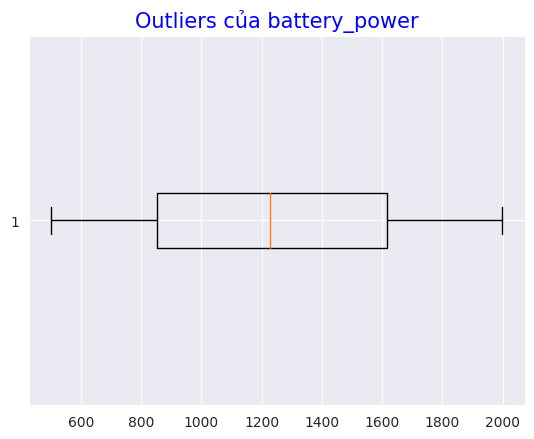

In [15]:
plt.boxplot(df['battery_power'], vert=False)
plt.title('Outliers của battery_power', fontsize = 15, color = 'b')
plt.show()

In [16]:
Q1 = np.percentile(df['battery_power'] , 25)
Q3 = np.percentile(df['battery_power'] , 75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outliers_upper = df['battery_power'][(df['battery_power'] > upper)] 
outliers_lower = df['battery_power'][(df['battery_power'] < lower)] 
print('Số lượng outliers cận trên:',len(outliers_upper))
print('Số lượng outliers cận dưới:',len(outliers_lower))

Số lượng outliers cận trên: 0
Số lượng outliers cận dưới: 0


**clock_speed(Không có outliers)**

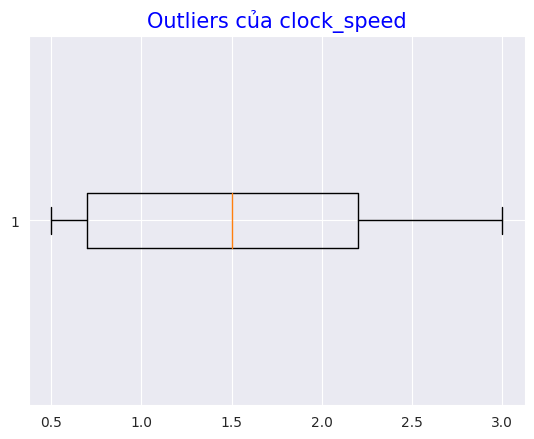

In [17]:
plt.boxplot(df['clock_speed'], vert=False)
plt.title('Outliers của clock_speed', fontsize = 15, color = 'b')
plt.show()

In [18]:
Q1 = np.percentile(df['clock_speed'] , 25)
Q3 = np.percentile(df['clock_speed'] , 75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outliers_upper = df['clock_speed'][(df['clock_speed'] > upper)] 
outliers_lower = df['clock_speed'][(df['clock_speed'] < lower)] 
print('Số lượng outliers cận trên:',len(outliers_upper))
print('Số lượng outliers cận dưới:',len(outliers_lower))

Số lượng outliers cận trên: 0
Số lượng outliers cận dưới: 0


**fc(Có Outliers)**

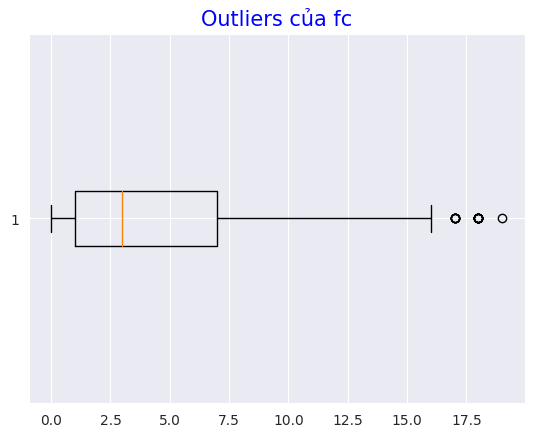

In [19]:
plt.boxplot(df['fc'], vert=False)
plt.title('Outliers của fc', fontsize = 15, color = 'b')
plt.show()

In [20]:
Q1 = np.percentile(df['fc'] , 25)
Q3 = np.percentile(df['fc'] , 75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outliers_upper = df['fc'][(df['fc'] > upper)] 
outliers_lower = df['fc'][(df['fc'] < lower)] 
print('Số lượng outliers cận trên:',len(outliers_upper))
print('Số lượng outliers cận dưới:',len(outliers_lower))

Số lượng outliers cận trên: 18
Số lượng outliers cận dưới: 0


In [21]:
df = df[(df['fc'] >= lower) & (df['fc'] <= upper)]

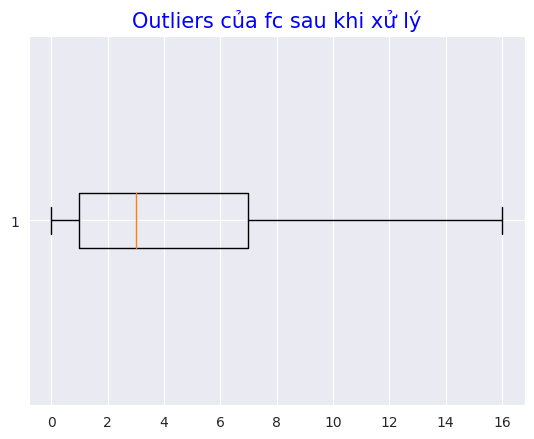

In [22]:
plt.boxplot(df['fc'], vert=False)
plt.title('Outliers của fc sau khi xử lý', fontsize = 15, color = 'b')
plt.show()

**int_memory(Không có outliers)**

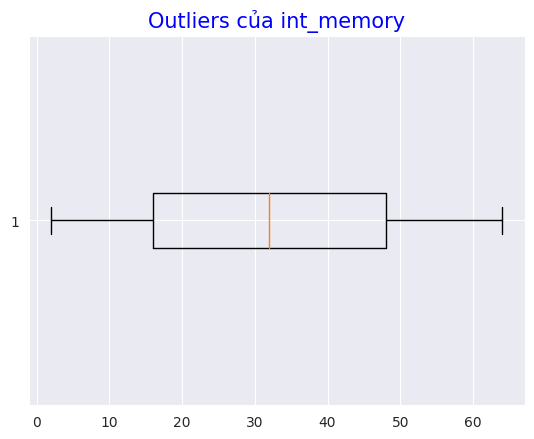

In [23]:
plt.boxplot(df['int_memory'], vert=False)
plt.title('Outliers của int_memory', fontsize = 15, color = 'b')
plt.show()

In [24]:
Q1 = np.percentile(df['int_memory'] , 25)
Q3 = np.percentile(df['int_memory'] , 75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outliers_upper = df['int_memory'][(df['int_memory'] > upper)] 
outliers_lower = df['int_memory'][(df['int_memory'] < lower)] 
print('Số lượng outliers cận trên:',len(outliers_upper))
print('Số lượng outliers cận dưới:',len(outliers_lower))

Số lượng outliers cận trên: 0
Số lượng outliers cận dưới: 0


**m_dep(Không có outliers)**

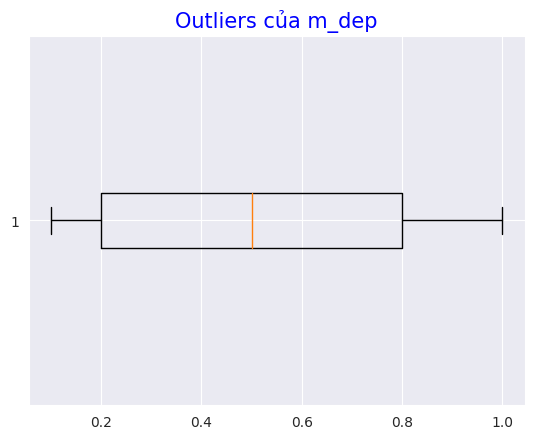

In [25]:
plt.boxplot(df['m_dep'], vert=False)
plt.title('Outliers của m_dep', fontsize = 15, color = 'b')
plt.show()

In [26]:
Q1 = np.percentile(df['m_dep'] , 25)
Q3 = np.percentile(df['m_dep'] , 75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outliers_upper = df['m_dep'][(df['m_dep'] > upper)] 
outliers_lower = df['m_dep'][(df['m_dep'] < lower)] 
print('Số lượng outliers cận trên:',len(outliers_upper))
print('Số lượng outliers cận dưới:',len(outliers_lower))

Số lượng outliers cận trên: 0
Số lượng outliers cận dưới: 0


**mobile_wt(Không có outlers)**

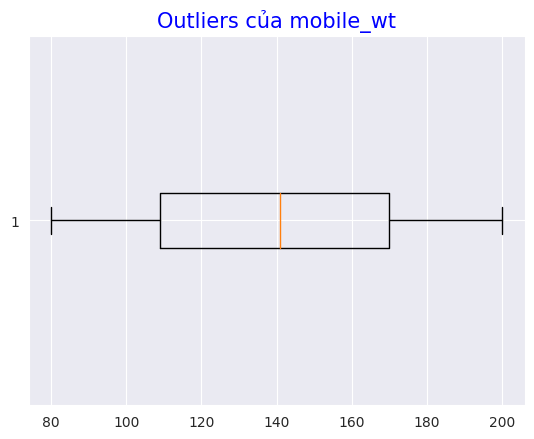

In [27]:
plt.boxplot(df['mobile_wt'], vert=False)
plt.title('Outliers của mobile_wt', fontsize = 15, color = 'b')
plt.show()

In [28]:
Q1 = np.percentile(df['mobile_wt'] , 25)
Q3 = np.percentile(df['mobile_wt'] , 75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outliers_upper = df['mobile_wt'][(df['mobile_wt'] > upper)] 
outliers_lower = df['mobile_wt'][(df['mobile_wt'] < lower)] 
print('Số lượng outliers cận trên:',len(outliers_upper))
print('Số lượng outliers cận dưới:',len(outliers_lower))

Số lượng outliers cận trên: 0
Số lượng outliers cận dưới: 0


**n_cores(Không có outliers)**

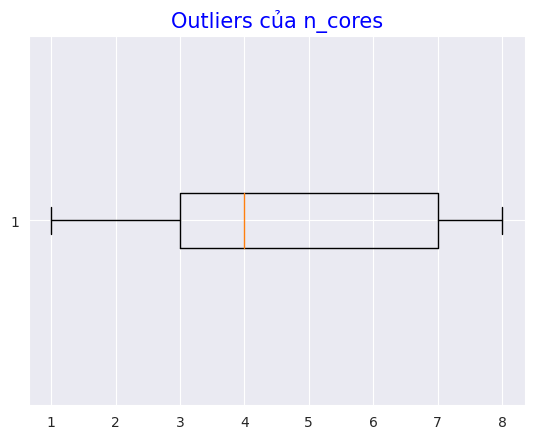

In [29]:
plt.boxplot(df['n_cores'], vert=False)
plt.title('Outliers của n_cores', fontsize = 15, color = 'b')
plt.show()

In [30]:
Q1 = np.percentile(df['n_cores'] , 25)
Q3 = np.percentile(df['n_cores'] , 75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outliers_upper = df['n_cores'][(df['n_cores'] > upper)] 
outliers_lower = df['n_cores'][(df['n_cores'] < lower)] 
print('Số lượng outliers cận trên:',len(outliers_upper))
print('Số lượng outliers cận dưới:',len(outliers_lower))

Số lượng outliers cận trên: 0
Số lượng outliers cận dưới: 0


**pc(Không có outliers)**

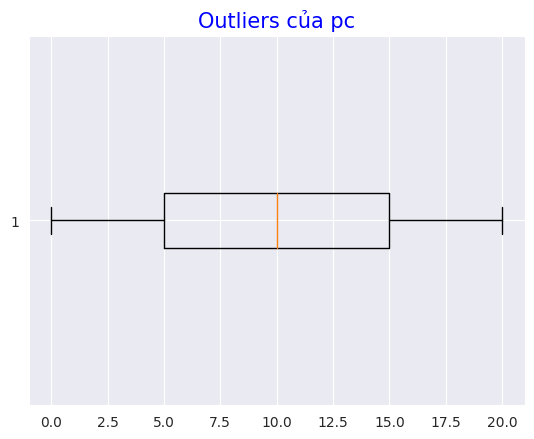

In [31]:
plt.boxplot(df['pc'], vert=False)
plt.title('Outliers của pc', fontsize = 15, color = 'b')
plt.show()

In [32]:
Q1 = np.percentile(df['pc'] , 25)
Q3 = np.percentile(df['pc'] , 75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outliers_upper = df['pc'][(df['pc'] > upper)] 
outliers_lower = df['pc'][(df['pc'] < lower)] 
print('Số lượng outliers cận trên:',len(outliers_upper))
print('Số lượng outliers cận dưới:',len(outliers_lower))

Số lượng outliers cận trên: 0
Số lượng outliers cận dưới: 0


**px_height(Có outliers)**

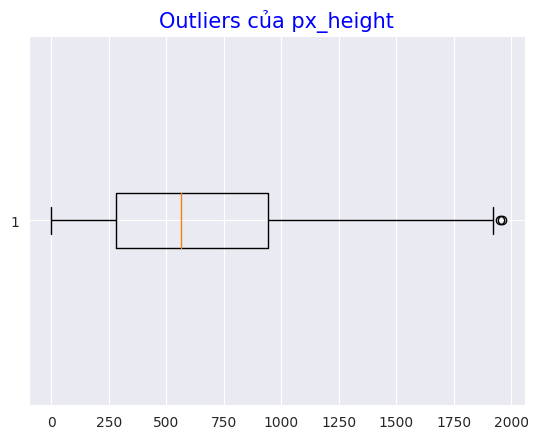

In [33]:
plt.boxplot(df['px_height'], vert=False)
plt.title('Outliers của px_height', fontsize = 15, color = 'b')
plt.show()

In [34]:
Q1 = np.percentile(df['px_height'] , 25)
Q3 = np.percentile(df['px_height'] , 75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outliers_upper = df['px_height'][(df['px_height'] > upper)] 
outliers_lower = df['px_height'][(df['px_height'] < lower)] 
print('Số lượng outliers cận trên:',len(outliers_upper))
print('Số lượng outliers cận dưới:',len(outliers_lower))

Số lượng outliers cận trên: 2
Số lượng outliers cận dưới: 0


In [35]:
df = df[(df['px_height'] >= lower) & (df['px_height'] <= upper)]

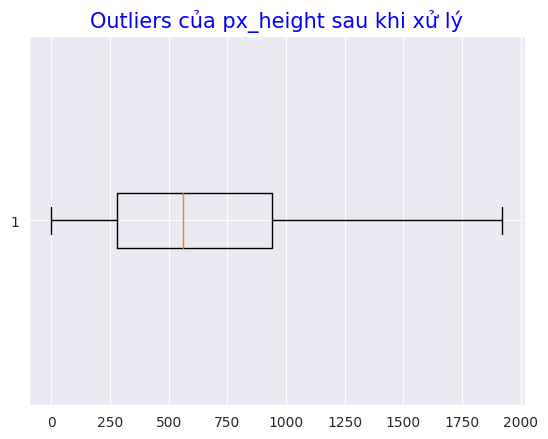

In [36]:
plt.boxplot(df['px_height'], vert=False)
plt.title('Outliers của px_height sau khi xử lý', fontsize = 15, color = 'b')
plt.show()

**px_width(Không có outliers)**

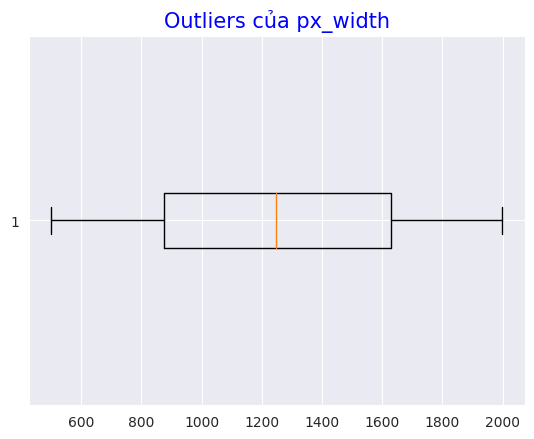

In [37]:
plt.boxplot(df['px_width'], vert=False)
plt.title('Outliers của px_width', fontsize = 15, color = 'b')
plt.show()

In [38]:
Q1 = np.percentile(df['px_width'] , 25)
Q3 = np.percentile(df['px_width'] , 75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outliers_upper = df['px_width'][(df['px_width'] > upper)] 
outliers_lower = df['px_width'][(df['px_width'] < lower)] 
print('Số lượng outliers cận trên:',len(outliers_upper))
print('Số lượng outliers cận dưới:',len(outliers_lower))

Số lượng outliers cận trên: 0
Số lượng outliers cận dưới: 0


**ram(Không có outliers)**

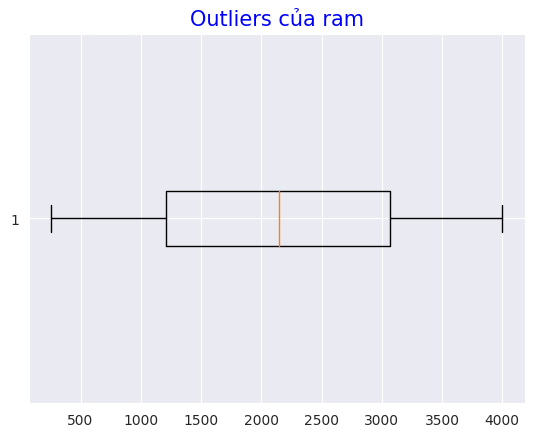

In [39]:
plt.boxplot(df['ram'], vert=False)
plt.title('Outliers của ram', fontsize = 15, color = 'b')
plt.show()

In [40]:
Q1 = np.percentile(df['ram'] , 25)
Q3 = np.percentile(df['ram'] , 75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outliers_upper = df['ram'][(df['ram'] > upper)] 
outliers_lower = df['ram'][(df['ram'] < lower)] 
print('Số lượng outliers cận trên:',len(outliers_upper))
print('Số lượng outliers cận dưới:',len(outliers_lower))

Số lượng outliers cận trên: 0
Số lượng outliers cận dưới: 0


**sc_h(Không có outliers)**

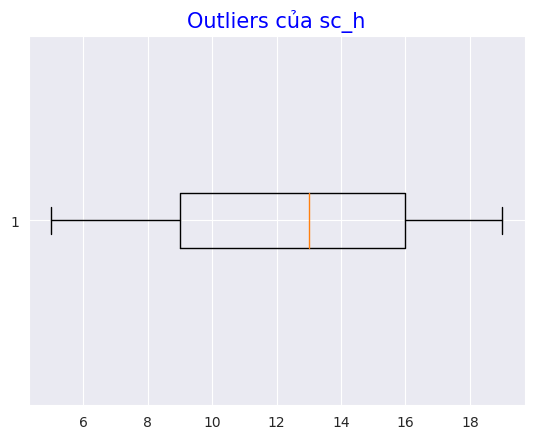

In [41]:
plt.boxplot(df['sc_h'], vert=False)
plt.title('Outliers của sc_h', fontsize = 15, color = 'b')
plt.show()

In [42]:
Q1 = np.percentile(df['sc_h'] , 25)
Q3 = np.percentile(df['sc_h'] , 75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outliers_upper = df['sc_h'][(df['sc_h'] > upper)] 
outliers_lower = df['sc_h'][(df['sc_h'] < lower)] 
print('Số lượng outliers cận trên:',len(outliers_upper))
print('Số lượng outliers cận dưới:',len(outliers_lower))

Số lượng outliers cận trên: 0
Số lượng outliers cận dưới: 0


**sc_w(Không có outliers)**

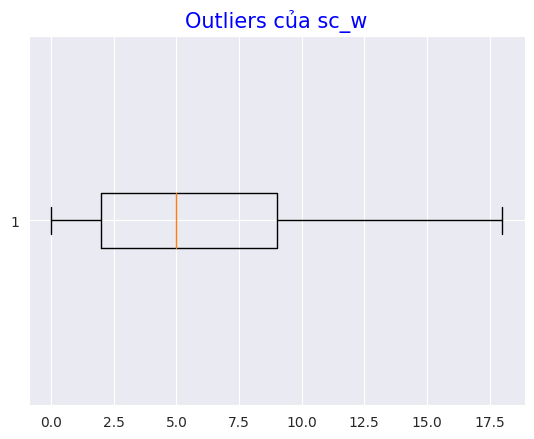

In [43]:
plt.boxplot(df['sc_w'], vert=False)
plt.title('Outliers của sc_w', fontsize = 15, color = 'b')
plt.show()

In [44]:
Q1 = np.percentile(df['sc_w'] , 25)
Q3 = np.percentile(df['sc_w'] , 75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outliers_upper = df['sc_w'][(df['sc_w'] > upper)] 
outliers_lower = df['sc_w'][(df['sc_w'] < lower)] 
print('Số lượng outliers cận trên:',len(outliers_upper))
print('Số lượng outliers cận dưới:',len(outliers_lower))

Số lượng outliers cận trên: 0
Số lượng outliers cận dưới: 0


**talk_time(Không có outliers)**

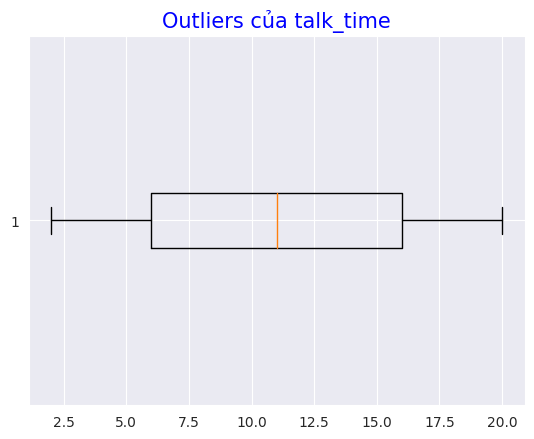

In [45]:
plt.boxplot(df['talk_time'], vert=False)
plt.title('Outliers của talk_time', fontsize = 15, color = 'b')
plt.show()

In [46]:
Q1 = np.percentile(df['talk_time'] , 25)
Q3 = np.percentile(df['talk_time'] , 75)
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
outliers_upper = df['talk_time'][(df['talk_time'] > upper)] 
outliers_lower = df['talk_time'][(df['talk_time'] < lower)] 
print('Số lượng outliers cận trên:',len(outliers_upper))
print('Số lượng outliers cận dưới:',len(outliers_lower))

Số lượng outliers cận trên: 0
Số lượng outliers cận dưới: 0


# Kiểm tra sau khi loại bỏ outliers

In [47]:
print("Số dòng m cũ  = ", len_df)
print("Số dòng m mới = ", df.shape[0])
print("Chênh lệch    =",len_df-df.shape[0])
print("Số cột n mới  = ", df.shape[1])

Số dòng m cũ  =  2000
Số dòng m mới =  1980
Chênh lệch    = 20
Số cột n mới  =  21


# Biểu đồ

**Heatmap**

Kích thước của datacorr:  (19, 19)
Kích thước của ones_corr: (19, 19)


<Axes: >

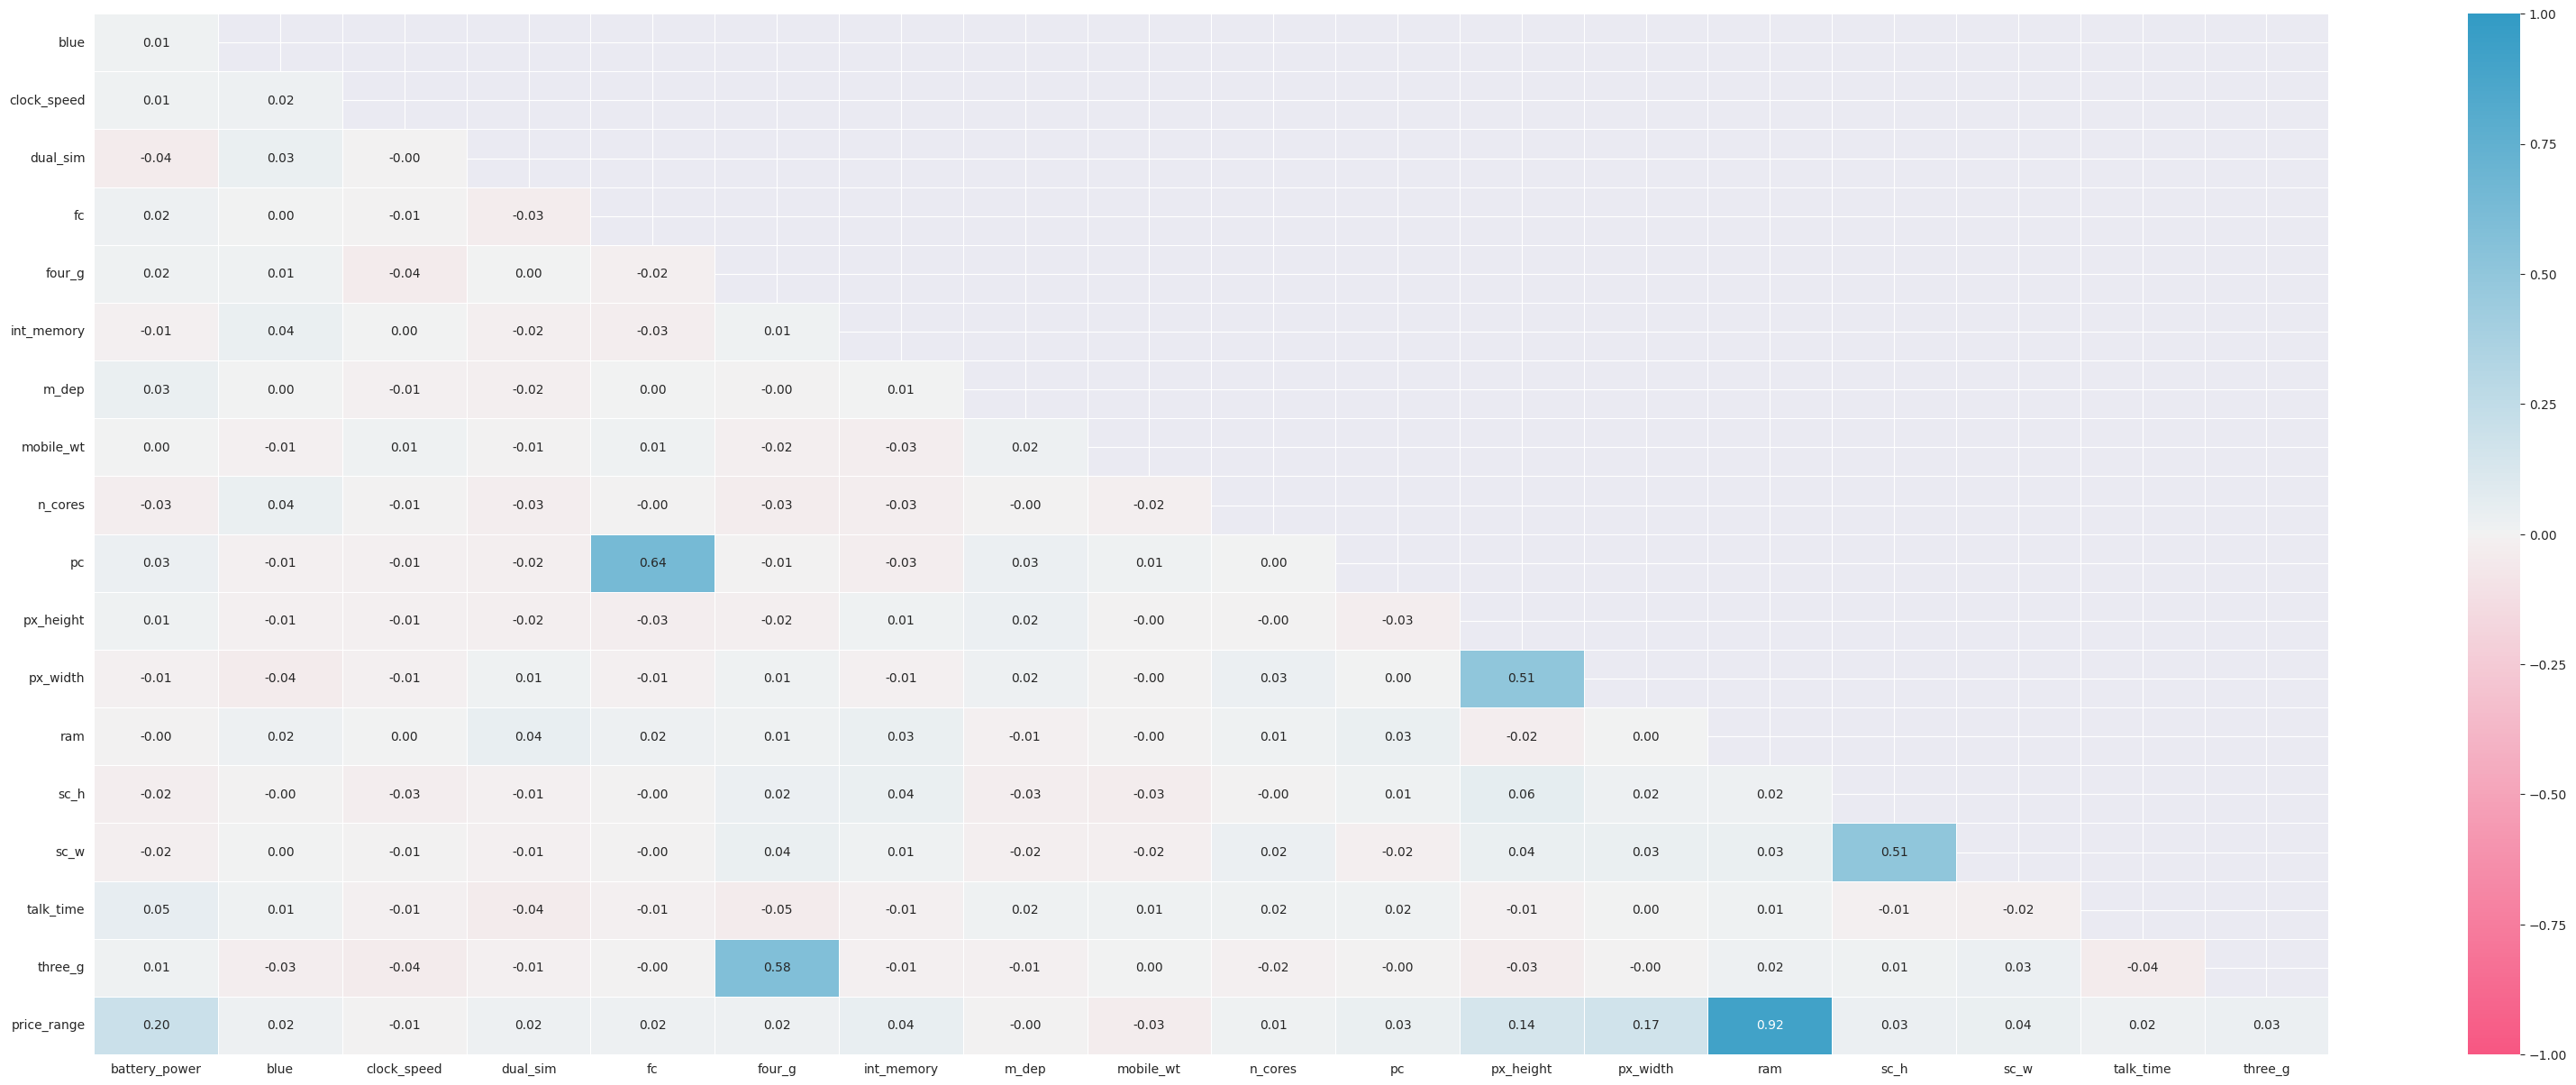

In [48]:
# Xét tương quan giữa các biến có kiểu dữ liệu số với target
dataset_corr = df.corr()

# In ma trận tam giác dưới
ones_corr = np.ones_like(dataset_corr, dtype = bool)

print('Kích thước của datacorr: ',ones_corr.shape)
print('Kích thước của ones_corr:' , dataset_corr.shape)

mask = np.triu(ones_corr)

## Bỏ hàng cuối, bỏ cột cuối trong bảng dataset_corr
adjusted_mask = mask[1: , :-1]
adjusted_mask_dataset_corr = dataset_corr.iloc[1: , :-1]

fig, ax = plt.subplots(figsize = (40, 15)) #heatmap chỉ nhận kiểu dữ liệu số
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap = True)
sns.heatmap(data = adjusted_mask_dataset_corr, mask = adjusted_mask, 
            annot = True, fmt = '.2f', 
            cmap = cmap, 
            vmin = -1, vmax = 1, 
            linecolor = 'white', linewidths = 0.5)

**Price Range - Ram**

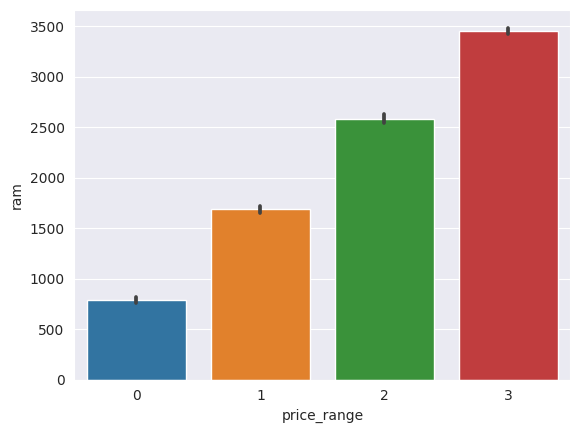

In [49]:
sns.barplot(data=df, x="price_range", y="ram")
plt.show()

**Price Range - Battery Power**

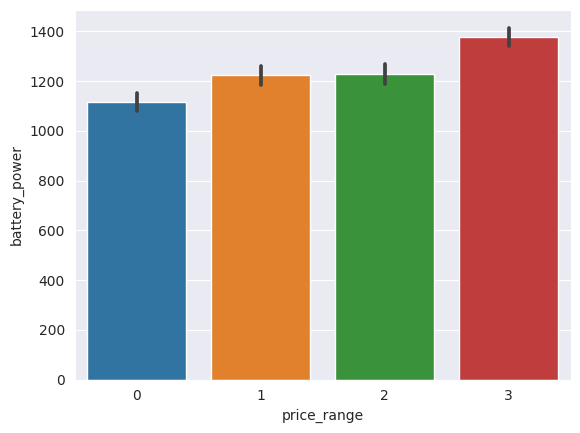

In [50]:
sns.barplot(data=df, x="price_range", y="battery_power")
plt.show()

**Price Range - PX Height**

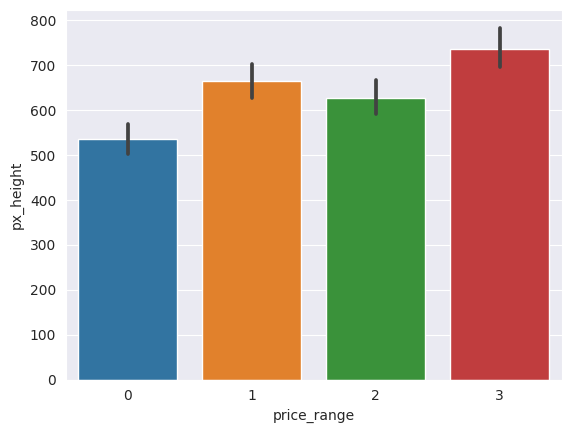

In [51]:
sns.barplot(data=df, x="price_range", y="px_height")
plt.show()

**Price Range - PX Width**

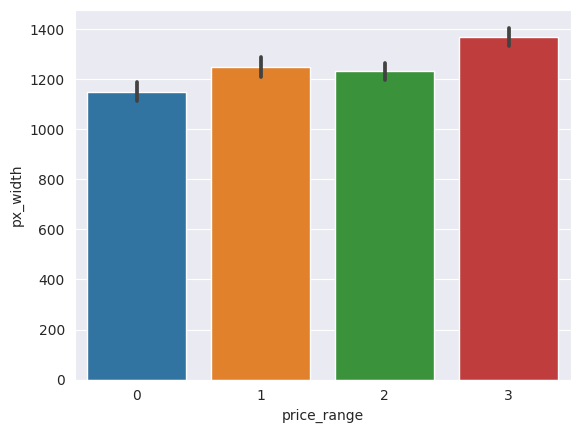

In [52]:
sns.barplot(data=df, x="price_range", y="px_width")
plt.show()

# Encoding dữ liệu Categorical

In [53]:
encoder = LabelEncoder()
encoder.fit(["Yes", "No"])

LabelEncoder()

In [54]:
df['wifi'] = encoder.transform(df['wifi'])
df['touch_screen'] = encoder.transform(df['touch_screen'])

In [55]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0.0,2.2,0.0,1,0.0,7,0.6,188,2,...,20,756,2549,9.0,7,19,0.0,0,1,1
1,1021,1.0,0.5,1.0,0,1.0,53,0.7,136,3,...,905,1988,2631,17.0,3,7,1.0,1,0,2
2,563,1.0,0.5,1.0,2,1.0,41,0.9,145,5,...,1263,1716,2603,11.0,2,9,1.0,1,0,2
3,615,1.0,2.5,0.0,0,0.0,10,0.8,131,6,...,1216,1786,2769,16.0,8,11,1.0,0,0,2
4,1821,1.0,1.2,0.0,13,1.0,44,0.6,141,2,...,1208,1212,1411,8.0,2,15,1.0,1,0,1


# Tách dữ liệu thành Features X và Target y

In [56]:
X = df.iloc[:, :20].values
y = df.iloc[:, 20:21].values

# Chuẩn hóa dữ liệu

In [57]:
sc = StandardScaler()
X = sc.fit_transform(X)
print("Dữ liệu sau khi chuẩn hóa:")
X[0]

Dữ liệu sau khi chuẩn hóa:


array([-0.89747427, -0.98894994,  0.83086164, -1.01835015, -0.76544664,
       -1.04230837, -1.38255799,  0.33874273,  1.3520954 , -1.10328271,
       -1.30131365, -1.41227303, -1.14403029,  0.3909165 , -0.79580688,
        0.28144878,  1.46544791, -1.78247446, -1.00303491,  0.98994949])

# One hot-encoding y phục vụ MLP

In [58]:
ohe = OneHotEncoder()
y_MLP = ohe.fit_transform(y).toarray()
print('One hot encoded:')
y_MLP[0:5]

One hot encoded:


array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [59]:
y[0:5]

array([[1],
       [2],
       [2],
       [2],
       [1]])

# Tách dữ liệu thành tập train và tập test

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [61]:
y_MLP_train, y_MLP_test = train_test_split(y_MLP, test_size = 0.2, random_state = 11)